# Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import pm_clean from 'pm_clean.csv' file
pm_clean=pd.read_csv('pm_clean.csv')
print(pm_clean.info())
print(pm_clean.head(3))

#convert 'date_time' column to DateTime format
pm_clean['date_time'] = pd.to_datetime(pm_clean['date_time'], format='%Y-%m-%d %H')
print(pm_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176267 entries, 0 to 176266
Data columns (total 17 columns):
Unnamed: 0       176267 non-null int64
year             176267 non-null int64
month            176267 non-null int64
day              176267 non-null int64
hour             176267 non-null int64
season           176267 non-null int64
dewp             175801 non-null float64
humi             175474 non-null float64
pres             175460 non-null float64
temp             175801 non-null float64
cbwd             175801 non-null object
iws              175793 non-null float64
precipitation    172181 non-null float64
iprec            172181 non-null float64
city             176267 non-null object
pm_average       176267 non-null float64
date_time        176267 non-null object
dtypes: float64(8), int64(6), object(3)
memory usage: 22.9+ MB
None
   Unnamed: 0  year  month  day  hour  season  dewp  humi    pres  temp cbwd  \
0           0  2010      1    1    22       4 -17.0  38.0  

In [3]:
#extract the data for city 'beijing' and store in bj
bj=pm_clean[pm_clean['city']=='beijing']

(0, 100)

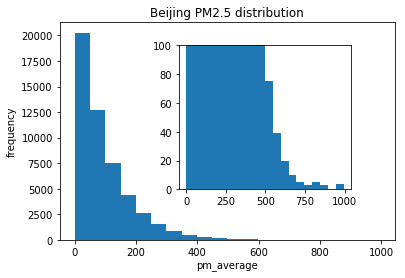

In [4]:
#plot 'pm_average' distribution for bj
plt.hist(bj['pm_average'], bins=20)
plt.xlabel('pm_average')
plt.ylabel('frequency')
plt.title('Beijing PM2.5 distribution')
plt.axes([0.4,0.3,0.4,0.5])
plt.hist(bj['pm_average'], bins=20)
plt.ylim([0,100])

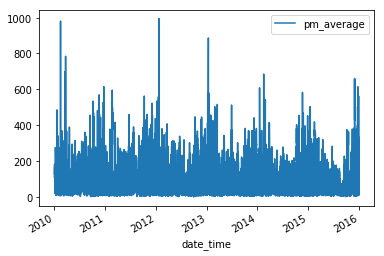

In [5]:
#plot time series 'pm_average' data for bj
bj.reset_index(drop=True).set_index('date_time').plot(y='pm_average')

(0, 160)

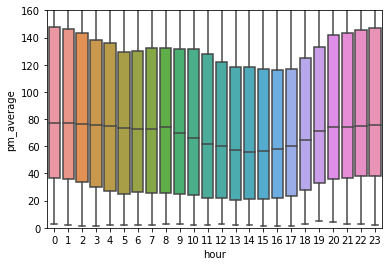

In [6]:
#plot 'pm_average' by hour
sns.boxplot(x='hour',y='pm_average',data=bj)
plt.ylim([0,160])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


([<matplotlib.axis.XTick at 0x118cf6780>,
 <a list of 7 Text xticklabel objects>)

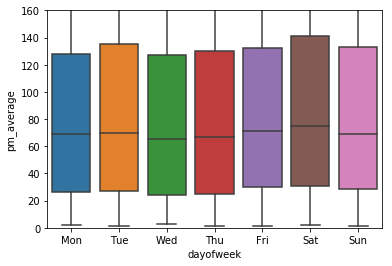

In [7]:
#plot 'pm_average' by day of the week
bj['dayofweek'] = bj['date_time'].dt.dayofweek
sns.boxplot(x='dayofweek',y='pm_average',data=bj)
plt.ylim([0,160])
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

(0, 180)

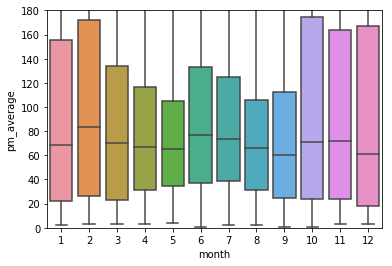

In [8]:
#plot 'pm_average' by month
sns.boxplot(x='month', y='pm_average',data=bj)
plt.ylim([0,180])

(0, 170)

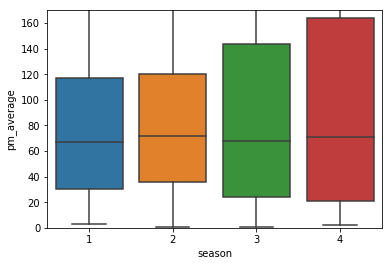

In [9]:
#plot 'pm_average' by season
sns.boxplot(x='season',y='pm_average',data=bj)
plt.ylim([0,170])

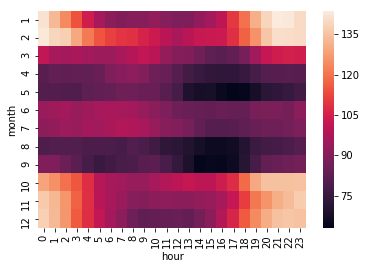

In [10]:
#plot 'pm_average' 2D distribution by month and by hour of the day
bj_monhr=bj.pivot_table(index='month',columns='hour',values='pm_average',aggfunc='mean')
sns.heatmap(bj_monhr)

pres   991.0   992.0   993.0   994.0   995.0   996.0   997.0   998.0   999.0   \
temp                                                                            
-19.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-18.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-17.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-16.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-15.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

pres   1000.0   ...       1037.0  1038.0  1039.0  1040.0  1041.0  1042.0  \
temp            ...                                                        
-19.0     NaN   ...          NaN     NaN     NaN     NaN     NaN     NaN   
-18.0     NaN   ...          NaN     NaN     NaN     NaN     NaN     NaN   
-17.0     NaN   ...          NaN    56.0     NaN     NaN     NaN     NaN   
-16.0     NaN   ...          NaN    58.0     NaN    

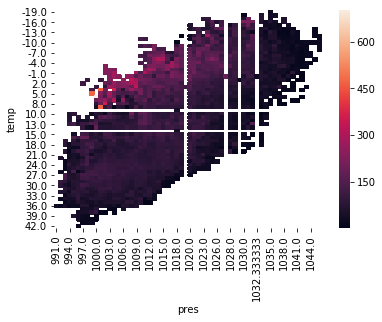

In [11]:
#plot 'pm_average' distribution by temperature and by pressure
bj_temppres=bj.pivot_table(index='temp',columns='pres',values='pm_average',aggfunc='mean')
print(bj_temppres.head())
sns.heatmap(bj_temppres)

ValueError: max must be larger than min in range parameter.

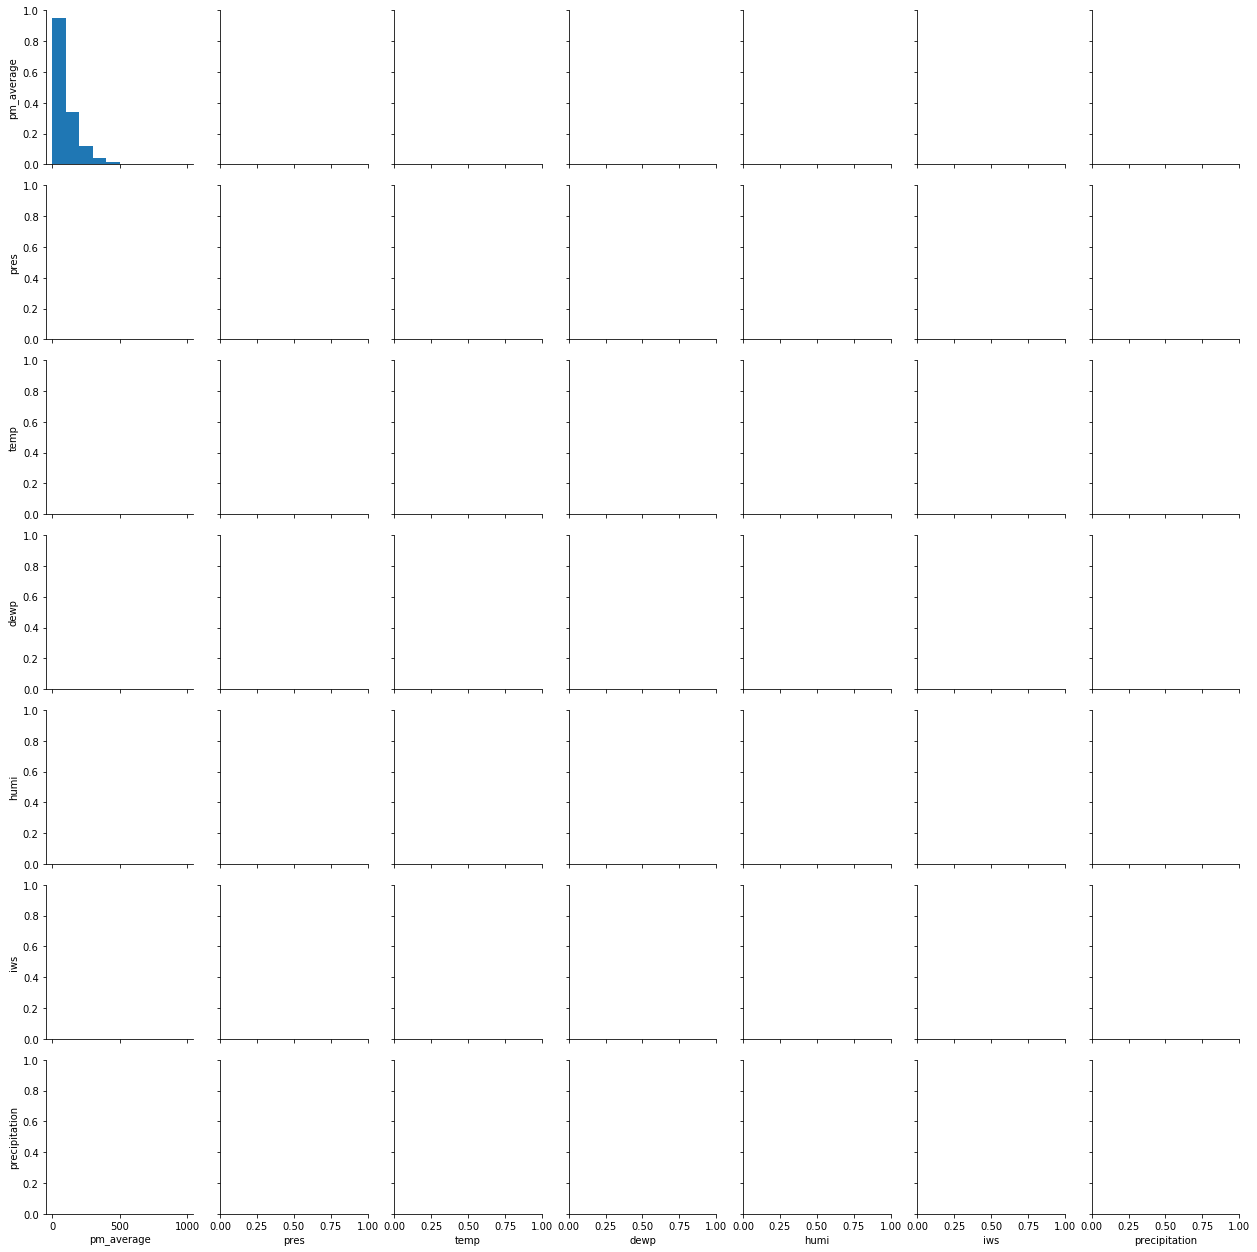

In [12]:
#plot correlation between 'pm_average' and the numerical columns that might have an impact on pm2.5
bj_corr=bj[['date_time','pm_average','pres','temp','dewp','humi','iws','precipitation']].reset_index(drop=True).set_index('date_time')
pm_corr=bj_corr.dropna()
sns.pairplot(bj_corr)

(0, 200)

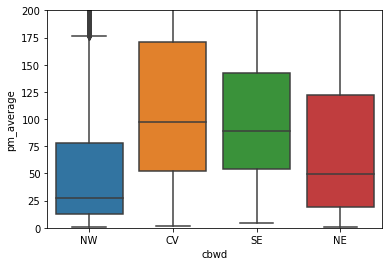

In [13]:
#plot 'pm_average' distribution by 'cbwd'
sns.boxplot(x='cbwd',y='pm_average',data=bj)
plt.ylim([0,200])

## pm_stations

In [14]:
#import pm_stations from 'pm_stations.csv' file
pm_stations = pd.read_csv('pm_stations.csv')

print(pm_stations.info())

#convert 'date_time' column to DateTime format
pm_stations['date_time']=pd.to_datetime(pm_stations['date_time'],format='%Y-%m-%d %H')
print(pm_stations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175245 entries, 0 to 175244
Data columns (total 19 columns):
date_time               175245 non-null object
year                    175245 non-null int64
month                   175245 non-null int64
day                     175245 non-null int64
hour                    175245 non-null int64
season                  175245 non-null int64
city                    175245 non-null object
pm_us post              167358 non-null float64
pm_dongsi               25052 non-null float64
pm_dongsihuan           20508 non-null float64
pm_nongzhanguan         24931 non-null float64
pm_jingan               24700 non-null float64
pm_xuhui                25189 non-null float64
pm_city station         32352 non-null float64
pm_5th middle school    21095 non-null float64
pm_caotangsi            24420 non-null float64
pm_shahepu              24594 non-null float64
pm_taiyuanjie           24388 non-null float64
pm_xiaoheyan            24627 non-null float64


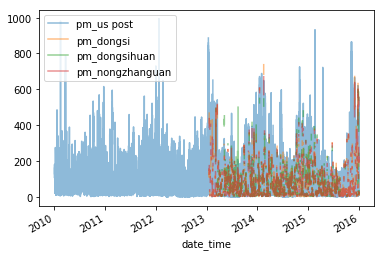

In [15]:
#extract the pm2.5 data from four stations in city 'beijing' and set 'date_time' column as DateTime Index
stations_bj=pm_stations[['date_time','pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan']].reset_index(drop=True).set_index('date_time')
#compare the consistency among four PM2.5 measuring locations in Beijing
stations_bj.plot(alpha=0.5)

#note prior to 2013, only 'PM_US Post' has PM2.5 data, whereas 'pm_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan' didn't have data until 2013

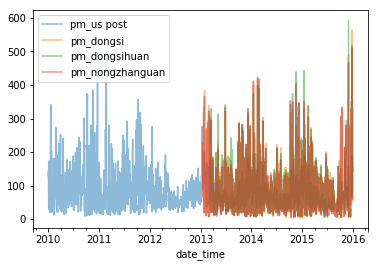

In [16]:
#resample by daily average
stations_bj_daily=stations_bj.resample('D').mean()
stations_bj_daily.plot(alpha=0.5)

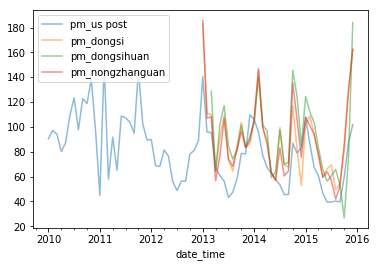

In [17]:
#resample by monthly average
stations_bj_monthly=stations_bj.resample('M').mean()
stations_bj_monthly.plot(alpha=0.5)

### Quick summary
the above plots reveal that the PM2.5 measurements at four different locations in Beijing are reasonably consistent, with minor variations.